In [2]:
import pandas as pd
import numpy as np
import wikipedia as wk
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import networkx as nx
import plotly
import plotly.plotly as py
import textstat as stat



%matplotlib inline

In [3]:
a='ДВАДЦАТЬ ЛЕТ РЕФОРМ ГЛАЗАМИ РОССИЯН (опыт многолетних социологических замеров) Аналитический доклад'

In [4]:
import textstat 

In [5]:
dir(textstat)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [6]:
import nltk
from nltk import tokenize as tk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/wiwernm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Wiktor Werner

# Zrozumieć drugi punkt widzenia. Tęsknota za ZSRR w rosyjskiej kulturze masowej 1991-2016

In [7]:
%%html
<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%D0%A1%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9+%D0%A1%D0%BE%D1%8E%D0%B7%2C%D0%A1%D0%BE%D1%8E%D0%B7+%D0%A1%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D1%85+%D0%A1%D0%BE%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85+%D0%A0%D0%B5%D1%81%D0%BF%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%2C%D0%A1%D0%A1%D0%A1%D0%A0&case_insensitive=on&year_start=1900&year_end=2000&corpus=25&smoothing=3&share=&direct_url=t4%3B%2C%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%3B%2Cc0%3B%2Cs0%3B%3B%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%3B%2Cc0%3B%3B%D0%A0%D0%9E%D0%A1%D0%A1%D0%98%D0%AF%3B%2Cc0%3B.t4%3B%2C%D0%A1%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9%20%D0%A1%D0%BE%D1%8E%D0%B7%3B%2Cc0%3B%2Cs0%3B%3B%D0%A1%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9%20%D0%A1%D0%BE%D1%8E%D0%B7%3B%2Cc0%3B%3B%D0%A1%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9%20%D1%81%D0%BE%D1%8E%D0%B7%3B%2Cc0%3B.t4%3B%2C%D0%A1%D0%BE%D1%8E%D0%B7%20%D0%A1%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D1%85%20%D0%A1%D0%BE%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85%20%D0%A0%D0%B5%D1%81%D0%BF%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%3B%2Cc0%3B%2Cs0%3B%3B%D0%A1%D0%BE%D1%8E%D0%B7%20%D0%A1%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D1%85%20%D0%A1%D0%BE%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85%20%D0%A0%D0%B5%D1%81%D0%BF%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%3B%2Cc0%3B%3B%D0%A1%D0%BE%D1%8E%D0%B7%20%D1%81%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D1%85%20%D1%81%D0%BE%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85%20%D1%80%D0%B5%D1%81%D0%BF%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%3B%2Cc0%3B%3B%D0%A1%D0%9E%D0%AE%D0%97%20%D0%A1%D0%9E%D0%92%D0%95%D0%A2%D0%A1%D0%9A%D0%98%D0%A5%20%D0%A1%D0%9E%D0%A6%D0%98%D0%90%D0%9B%D0%98%D0%A1%D0%A2%D0%98%D0%A7%D0%95%D0%A1%D0%9A%D0%98%D0%A5%20%D0%A0%D0%95%D0%A1%D0%9F%D0%A3%D0%91%D0%9B%D0%98%D0%9A%3B%2Cc0%3B%3B%D0%A1%D0%BE%D1%8E%D0%B7%20%D0%A1%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D1%85%20%D0%A1%D0%BE%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85%20%D1%80%D0%B5%D1%81%D0%BF%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%3B%2Cc0%3B.t1%3B%2C%D0%A1%D0%A1%D0%A1%D0%A0%3B%2Cc0" width=900 height=900 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

In [8]:
cccp=pd.read_csv('filmy_cccp.csv')

In [9]:
rusfilm=pd.read_csv('rus_film_yt.csv', header=1, parse_dates=['Miesiąc'])
rusfilm.set_index('Miesiąc', inplace=True, drop=False)

In [10]:
rus_wiki=pd.read_csv('page_rus.csv', header=0, parse_dates=['Date'])
rus_wiki.set_index('Date', inplace=True, drop=False)

In [11]:
rus_wiki2=pd.read_csv('page_rus_cccp.csv', header=0, parse_dates=['Date'])
rus_wiki2.set_index('Date', inplace=True, drop=False)

In [7]:
rus_wiki3=pd.read_csv('page_rus_cccp2.csv', header=0, parse_dates=['Date'])
rus_wiki3.set_index('Date', inplace=True, drop=False)

In [13]:
prl_wiki=pd.read_csv('page_prl.csv', header=0, parse_dates=['Date'])
prl_wiki.set_index('Date', inplace=True, drop=False)

In [14]:
rus=pd.read_csv('rus2.csv', header=1, parse_dates=['time'])
rus.set_index('time', inplace=True, drop=False)

In [10]:
rus_yan=pd.read_csv('yandex_rus.csv', parse_dates=['data'])
rus_yan.set_index('data', inplace=True, drop=False)

In [17]:
prl=pd.read_csv('prl1.csv', header=1, parse_dates=['time'])
prl.set_index('time', inplace=True, drop=False)

In [25]:
daty=pd.read_csv('rus_daty3.csv', header=1, parse_dates=['months'])
daty.set_index('months', inplace=True, drop=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20e5b80f28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f20e59765f8>], dtype=object)

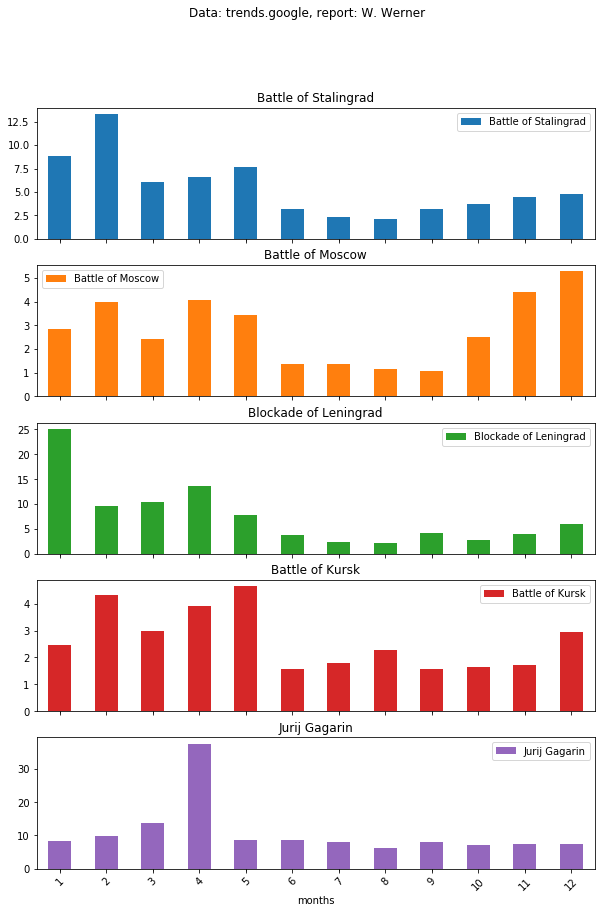

In [27]:
daty.groupby(by=daty.months.dt.month).mean().plot(kind='bar', subplots=True, figsize=[10,14], rot=45, title='Data: trends.google, report: W. Werner')

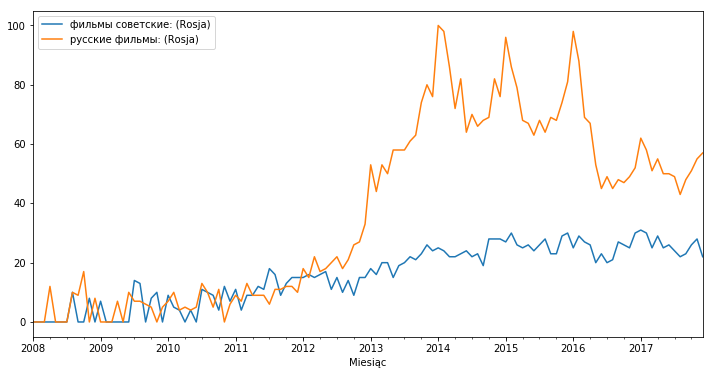

In [12]:
rusfilm.plot(figsize=[12,6])

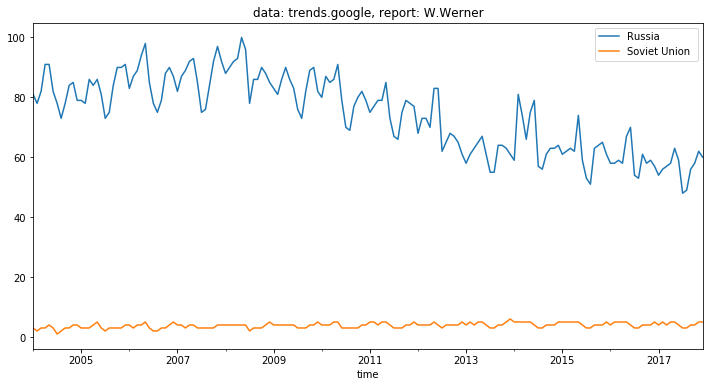

In [16]:
rus.plot(figsize=[12,6], title='data: trends.google, report: W.Werner')

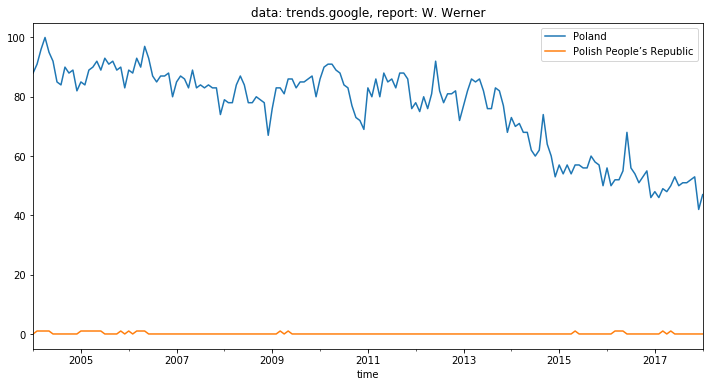

In [18]:
prl.plot(figsize=[12,6], title='data: trends.google, report: W. Werner')

In [29]:
prl.mean()

Polska: (Polska)                          75.928994
Polska Rzeczpospolita Ludowa: (Polska)     0.136095
dtype: float64

In [30]:
rus.mean()

Rosja: (Rosja)                                            74.446429
Związek Socjalistycznych Republik Radzieckich: (Rosja)     3.869048
dtype: float64

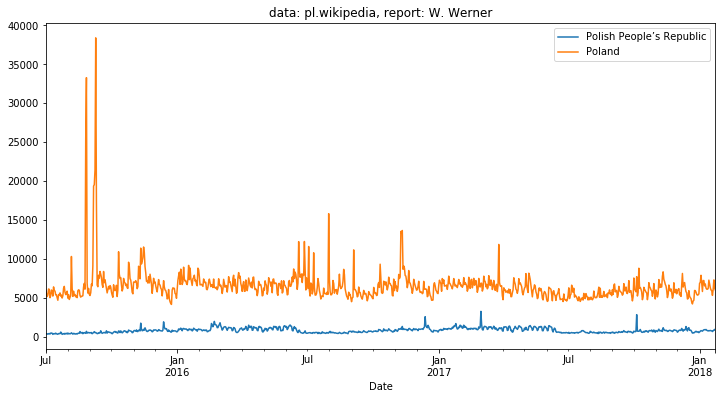

In [14]:
prl_wiki.plot(figsize=[12,6], title='data: pl.wikipedia, report: W. Werner')

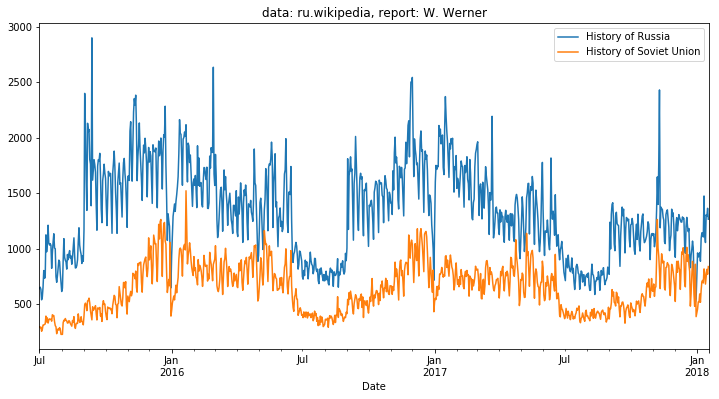

In [12]:
rus_wiki2.plot(figsize=[12,6], title='data: ru.wikipedia, report: W. Werner')

In [33]:
rus_wiki2.corr()

,История России,История СССР
История России,1.000000,0.688642
История СССР,0.688642,1.000000


In [34]:
prl_wiki.corr()

,Polska Rzeczpospolita Ludowa,Polska
Polska Rzeczpospolita Ludowa,1.000000,0.124195
Polska,0.124195,1.000000


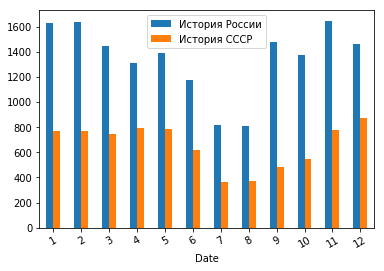

In [35]:
rus_wiki2.groupby(by=rus_wiki2.Date.dt.month).mean().plot(kind='bar', rot=30)

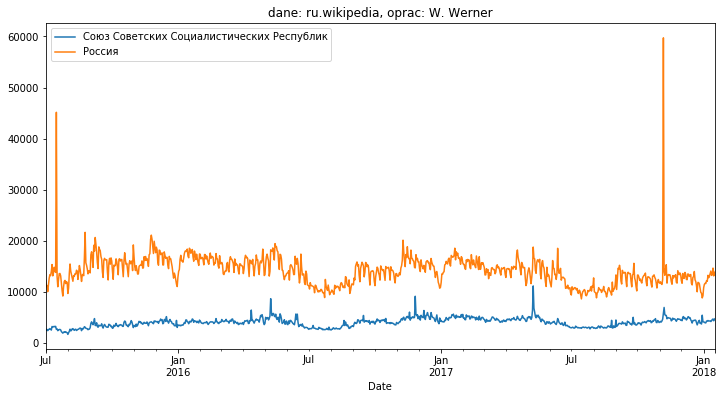

In [36]:
rus_wiki3.plot(figsize=[12,6], title='dane: ru.wikipedia, oprac: W. Werner')

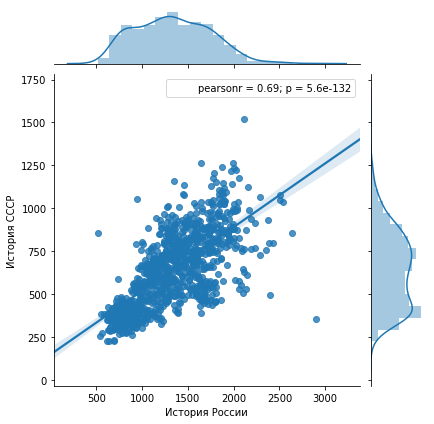

In [37]:
sns.jointplot(x=rus_wiki2[rus_wiki2.columns[1]], y=rus_wiki2[rus_wiki2.columns[2]], kind='reg')

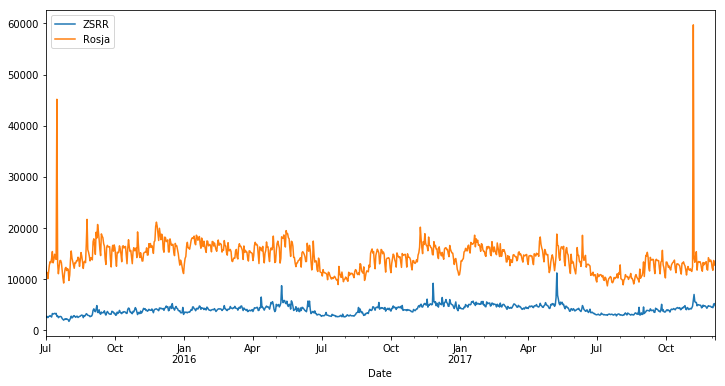

In [38]:
rus_wiki.plot(figsize=[12,6])

In [39]:
mapa=pd.read_csv('geoMap.csv', header=1)
mapa.set_index('Kraj', inplace=True)

In [40]:
def keywords():
    nazwa=input('podaj lokalizację pliku ')
    dane=open(str(nazwa), 'r').read()
    dane=dane.replace('"', '')
    dane=dane.replace("'", '')
    dane2=tk.word_tokenize(dane)
    for i in dane2:
        if len(i)<3:
            dane2.remove(i)
    dane3=dane.split('\n')
    stat=nltk.FreqDist(dane2)
    data=pd.DataFrame({'word':list(stat.keys()), 'numer':list(stat.values())})
    data.set_index('word', inplace=True, drop=False)
    data.to_csv('keywords.csv')
    
    

In [41]:
pwd

'/home/wiwernm/wiktor2.0/zsrr_prl'

In [42]:
dane=open('Keyword Tool Export - ссср3.csv', 'r').read()
dane=dane.replace('"', '')
dane=dane.replace("'", '')
dane2=tk.word_tokenize(dane)

In [43]:
for i in dane2:
    if len(i)<3:
        dane2.remove(i)

In [44]:
dane3=dane.split('\n')

In [45]:
dane3

['советский союз гимн',
 'советский союз на английском',
 'советский союз карта',
 'советский союз песня',
 'советский союз линкор',
 'советский союз как пишется',
 'советский союз распался в',
 'советский союз фото',
 'советский союз лурк',
 'советский союз до революции',
 'советский союз',
 'советский союз флаг',
 'советский союз годы',
 'советский союз ассоциации',
 'советский союз атомный ледокол',
 'советский союз альтернативная история',
 'советский союз атеизм',
 'советский союз англ',
 'советский союз архитекторов',
 'советский союз авианосец',
 'журнал советский союз архив',
 'советский союз в афганистане',
 'советский союз был распущен в',
 'советский союз был исключен из лиги наций',
 'советский союз будет восстановлен',
 'советский союз был создан',
 'советский союз будущего',
 'советский союз будет воссоздан',
 'советский союз с большой буквы',
 'советский союз при брежневе',
 'когда советский союз был принят в лигу наций',
 'советский союз сбил боинг',
 'советский союз ра

In [46]:
stat=nltk.FreqDist(dane2)

In [47]:
data=pd.DataFrame({'word':list(stat.keys()), 'numer':list(stat.values())})
data.set_index('word', inplace=True, drop=False)

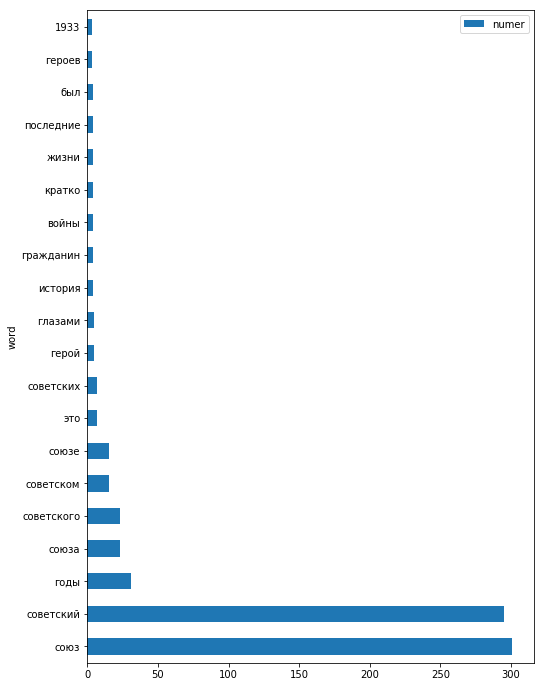

In [48]:
data.sort_values(by="numer", ascending=False).head(20).plot(kind='barh', figsize=[8,12])

In [49]:
cccp.film

0     Иван Васильевич меняет профессию (1973) 88 мин...
1     Операция «Ы» и другие приключения Шурика (1965...
2     В бой идут одни «старики» (1973) 87 мин.  СССР...
3     Бриллиантовая рука (1968) 94 мин.  СССР,  реж....
4     Джентльмены удачи (1971) 84 мин.  СССР,  реж. ...
5     ...А зори здесь тихие (1972) 160 мин.  СССР,  ...
6     Приключения Шерлока Холмса и доктора Ватсона: ...
7     Кавказская пленница, или Новые приключения Шур...
8     Собачье сердце (ТВ) (1988) 136 мин.  СССР,  ре...
9     Офицеры (1971) 91 мин.  СССР,  реж. Владимир Р...
10    Москва слезам не верит (1979) 150 мин.  СССР, ...
11    Летят журавли (1957) 95 мин.  СССР,  реж. Миха...
12    Судьба человека (1959) 97 мин.  СССР,  реж. Се...
13    Белый Бим Черное ухо (1976) 183 мин.  СССР,  р...
14    Служебный роман (1977) 159 мин.  СССР,  реж. Э...
15    Шерлок Холмс и доктор Ватсон: Смертельная схва...
16    Они сражались за Родину (1975) 160 мин.  СССР,...
17    Шерлок Холмс и доктор Ватсон: Кровавая над